<a href="https://colab.research.google.com/github/AmiraliLalehpour/MMAI-823-Final-Project/blob/main/earnings_momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from google.colab import drive

In [81]:
# Mount Google Drive to access files
drive.mount('/content/drive')

# Replace 'file.csv' with the actual name of your CSV file
file_path = '/content/drive/My Drive/Finance/output.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
data.head()

,score,id,comms_num,timestamp,text,original_text,Weekday,negative_score,positive_score,neutral_score,compound_score,overall_sentiment,text_sentiment_polarity,text_sentiment_subjectivity
0,55,l6ulcx,6,2021-01-28 21:37:41,money sending message 🚀 💎 🙌,"It's not about the money, it's about sending a...",Thursday,0.000,0.000,1.000,0.0000,Neutral,0.000000,0.000000
1,110,l6uibd,23,2021-01-28 21:32:10,math professor scott steiner says numbers spel...,Math Professor Scott Steiner says the numbers ...,Thursday,0.313,0.000,0.687,-0.6249,Negative,0.000000,0.000000
2,0,l6uhhn,47,2021-01-28 21:30:35,exit system ceo nasdaq pushed halt trading inv...,Exit the system The CEO of NASDAQ pushed to ha...,Thursday,0.112,0.125,0.763,0.3400,Positive,-0.000923,0.389370
3,29,l6ugk6,74,2021-01-28 21:28:57,new sec filing gme retarded interpret,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,Thursday,0.425,0.000,0.575,-0.5719,Negative,-0.254545,0.618182
4,71,l6ufgy,156,2021-01-28 21:26:56,distract gme thought amc brothers aware,"Not to distract from GME, just thought our AMC...",Thursday,0.306,0.000,0.694,-0.2960,Negative,0.250000,0.250000


In [83]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [84]:
# Find the minimum and maximum values of the "timestamp" column
min_timestamp = data['timestamp'].min()
max_timestamp = data['timestamp'].max()

# Print the results
print("Minimum Timestamp:", min_timestamp)
print("Maximum Timestamp:", max_timestamp)

Minimum Timestamp: 2021-01-28 09:08:16
Maximum Timestamp: 2021-08-16 09:26:20


In [85]:
df_sorted_sentiment = data.sort_values('timestamp')
df_sorted_sentiment.head()

,score,id,comms_num,timestamp,text,original_text,Weekday,negative_score,positive_score,neutral_score,compound_score,overall_sentiment,text_sentiment_polarity,text_sentiment_subjectivity
257,50,l6h58v,8,2021-01-28 09:08:16,autists journeymonth storytime,An autists journey. $150 to $68k in one month....,Thursday,0.000,0.000,1.000,0.0000,Neutral,0.000000,0.000000
256,70,l6h59b,7,2021-01-28 09:08:17,melvin live,You all have made Melvin live up to its name,Thursday,0.000,0.000,1.000,0.0000,Neutral,0.136364,0.500000
255,75,l6h5a2,14,2021-01-28 09:08:18,got late gme believe cause willing lose guys a...,I got in late on GME but I believe in the caus...,Thursday,0.190,0.206,0.603,0.1779,Positive,0.030000,0.726667
254,26,l6h5am,22,2021-01-28 09:08:19,highest si float end business jan th according...,Highest SI % of Float End of Business Jan 27th...,Thursday,0.000,0.059,0.941,0.2960,Positive,0.000000,0.000000
252,0,l6h5bt,6,2021-01-28 09:08:21,discord nt talk anti bot measure admin contact...,Discord still down i can't see how to talk to ...,Thursday,0.271,0.245,0.483,0.0772,Positive,0.400000,0.800000


In [86]:
df_daily_compound = df_sorted_sentiment.groupby(pd.Grouper(key='timestamp', freq='D')).agg({'compound_score': 'mean'}).reset_index()


In [87]:
df_daily_compound['sentiment_signal'] = df_daily_compound['compound_score'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))


In [88]:
df_daily_compound.set_index('timestamp', inplace=True)
df_daily_compound.head()

,compound_score,sentiment_signal
timestamp,,
2021-01-28,0.029089,1
2021-01-29,-0.018890,-1
2021-01-30,0.137982,1
2021-01-31,0.145259,1
2021-02-01,0.143150,1


In [89]:
stockList = ["GME", "AMC"]

In [90]:
startDate = "2021-01-28"
endDate = "2021-08-16"

In [91]:
df = yf.download(stockList, start=startDate, end=endDate)


[*********************100%***********************]  2 of 2 completed


In [92]:
df.head()

Adj Close             Close              High                Low  \
                 AMC        GME    AMC        GME    AMC         GME    AMC   
Date                                                                          
2021-01-28      8.63  48.400002   8.63  48.400002  16.50  120.750000   6.51   
2021-01-29     13.26  81.250000  13.26  81.250000  16.00  103.495003  11.60   
2021-02-01     13.30  56.250000  13.30  56.250000  17.25   80.500000  12.91   
2021-02-02      7.82  22.500000   7.82  22.500000  10.10   39.500000   6.00   
2021-02-03      8.97  23.102501   8.97  23.102501   9.77   28.350000   7.89   

                      Open                Volume             
                GME    AMC        GME        AMC        GME  
Date                                                         
2021-01-28  28.0625  11.98  66.250000  591223900  235263200  
2021-01-29  62.5000  14.31  94.927498  602193300  202264400  
2021-02-01  53.0000  17.00  79.139999  434608000  149528800  
2021-02-02  18.5550   9.48  35.189999  462775900  312732400  
2021-02-03  21.3125   8.85  28.002501  221405100  170794000

In [93]:
# Reset index
df.reset_index(drop=False, inplace=True)
print(df)

          Date  Adj Close                 Close                  High  \
                      AMC        GME        AMC        GME        AMC   
0   2021-01-28   8.630000  48.400002   8.630000  48.400002  16.500000   
1   2021-01-29  13.260000  81.250000  13.260000  81.250000  16.000000   
2   2021-02-01  13.300000  56.250000  13.300000  56.250000  17.250000   
3   2021-02-02   7.820000  22.500000   7.820000  22.500000  10.100000   
4   2021-02-03   8.970000  23.102501   8.970000  23.102501   9.770000   
..         ...        ...        ...        ...        ...        ...   
133 2021-08-09  33.799999  40.282501  33.799999  40.282501  35.380001   
134 2021-08-10  31.750000  39.762501  31.750000  39.762501  37.160000   
135 2021-08-11  31.549999  39.695000  31.549999  39.695000  31.910000   
136 2021-08-12  33.070000  40.587502  33.070000  40.587502  34.099998   
137 2021-08-13  33.470001  40.630001  33.470001  40.630001  34.480000   

                       Low                  Open  

In [94]:
# Calculate daily returns
df['AMC_returns'] = df['Adj Close']['AMC'].pct_change()
df['GME_returns'] = df['Adj Close']['GME'].pct_change()

In [95]:
# Calculate the 4-week earnings momentum (percentage change in cumulative returns over 4 weeks)
df['AMC_Earnings_Momentum'] = df['AMC_returns'].rolling(window=20).sum()
df['GME_Earnings_Momentum'] = df['GME_returns'].rolling(window=20).sum()


In [96]:
df.head()

Date Adj Close             Close              High                Low  \
                   AMC        GME    AMC        GME    AMC         GME    AMC   
0 2021-01-28      8.63  48.400002   8.63  48.400002  16.50  120.750000   6.51   
1 2021-01-29     13.26  81.250000  13.26  81.250000  16.00  103.495003  11.60   
2 2021-02-01     13.30  56.250000  13.30  56.250000  17.25   80.500000  12.91   
3 2021-02-02      7.82  22.500000   7.82  22.500000  10.10   39.500000   6.00   
4 2021-02-03      8.97  23.102501   8.97  23.102501   9.77   28.350000   7.89   

             Open                Volume            AMC_returns GME_returns  \
       GME    AMC        GME        AMC        GME                           
0  28.0625  11.98  66.250000  591223900  235263200         NaN         NaN   
1  62.5000  14.31  94.927498  602193300  202264400    0.536501    0.678719   
2  53.0000  17.00  79.139999  434608000  149528800    0.003017   -0.307692   
3  18.5550   9.48  35.189999  462775900  312732400   -0.412030   -0.600000   
4  21.3125   8.85  28.002501  221405100  170794000    0.147059    0.026778   

  AMC_Earnings_Momentum GME_Earnings_Momentum  
                                               
0                   NaN                   NaN  
1                   NaN                   NaN  
2                   NaN                   NaN  
3                   NaN                   NaN  
4                   NaN                   NaN

In [97]:
# Most recent date of data
most_recent_date = df['Date'].iloc[-1]

In [98]:
# Most recent earnings momentum for AMC and GME
amc_momentum = df.loc[df['Date'] == most_recent_date, 'AMC_Earnings_Momentum'].iloc[0]
gme_momentum = df.loc[df['Date'] == most_recent_date, 'GME_Earnings_Momentum'].iloc[0]

In [99]:
# Stock with the highest earnings momentum for investment
best_stock = 'AMC' if amc_momentum > gme_momentum else 'GME'

In [100]:
print(f"The best stock to invest based on earnings momentum is: {best_stock}")


The best stock to invest based on earnings momentum is: AMC


In [107]:
# Generate the buy/sell signals for AMC
def generate_trading_signals(df):
    signals = []
    position = 0

    for i in range(1, len(df)):
        if df['AMC_Earnings_Momentum'][i] > 0 and df['Adj Close']['AMC'][i] > df['Adj Close']['AMC'][i-1]:
            signals.append(1)  # Buy signal
            position = 1
        elif df['AMC_Earnings_Momentum'][i] <= 0 or df['Adj Close']['AMC'][i] < df['Adj Close']['AMC'][i-1]:
            signals.append(-1)  # Sell signal
            position = 0
        else:
            signals.append(0)  # No signal, hold position

    # Append 0 for the first row since there is no signal at the beginning
    signals.insert(0, 0)
    df['Signal'] = signals

    return df

In [108]:
# Generate trading signals
df_with_signals = generate_trading_signals(df)

In [109]:
# Print trading signals
print(df_with_signals)

          Date  Adj Close                 Close                  High  \
                      AMC        GME        AMC        GME        AMC   
0   2021-01-28   8.630000  48.400002   8.630000  48.400002  16.500000   
1   2021-01-29  13.260000  81.250000  13.260000  81.250000  16.000000   
2   2021-02-01  13.300000  56.250000  13.300000  56.250000  17.250000   
3   2021-02-02   7.820000  22.500000   7.820000  22.500000  10.100000   
4   2021-02-03   8.970000  23.102501   8.970000  23.102501   9.770000   
..         ...        ...        ...        ...        ...        ...   
133 2021-08-09  33.799999  40.282501  33.799999  40.282501  35.380001   
134 2021-08-10  31.750000  39.762501  31.750000  39.762501  37.160000   
135 2021-08-11  31.549999  39.695000  31.549999  39.695000  31.910000   
136 2021-08-12  33.070000  40.587502  33.070000  40.587502  34.099998   
137 2021-08-13  33.470001  40.630001  33.470001  40.630001  34.480000   

                       Low                  Open  

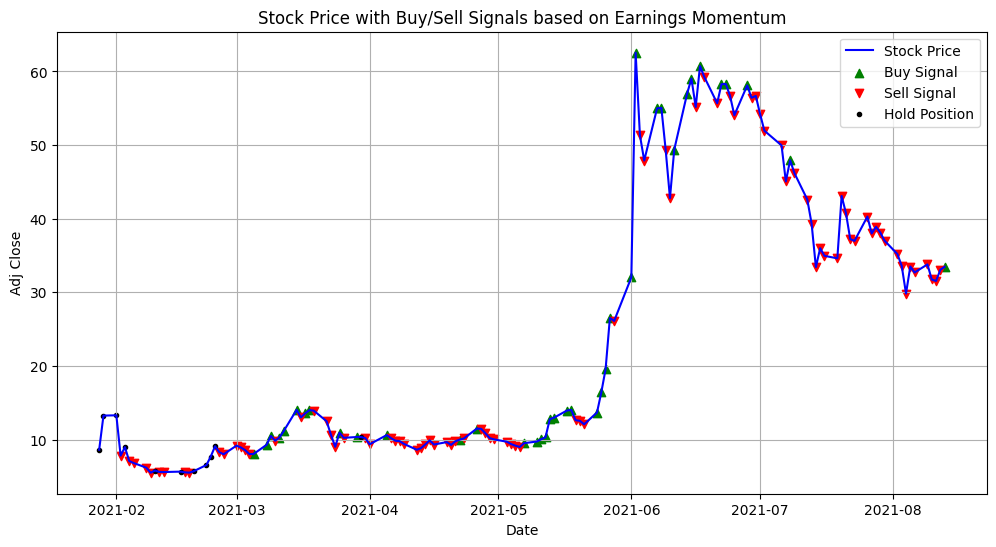

In [111]:
# Plot the stock price along with buy/sell signals
plt.figure(figsize=(12, 6))
plt.plot(df_with_signals['Date'], df_with_signals['Adj Close']['AMC'], label='Stock Price', color='blue')
plt.scatter(df_with_signals['Date'][df_with_signals['Signal'] == 1],
            df_with_signals['Adj Close']['AMC'][df_with_signals['Signal'] == 1],
            marker='^', color='green', label='Buy Signal')
plt.scatter(df_with_signals['Date'][df_with_signals['Signal'] == -1],
            df_with_signals['Adj Close']['AMC'][df_with_signals['Signal'] == -1],
            marker='v', color='red', label='Sell Signal')
plt.scatter(df_with_signals['Date'][df_with_signals['Signal'] == 0],
            df_with_signals['Adj Close']['AMC'][df_with_signals['Signal'] == 0],
            marker='.', color='black', label='Hold Position')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Stock Price with Buy/Sell Signals based on Earnings Momentum')
plt.legend()
plt.grid(True)
plt.show()

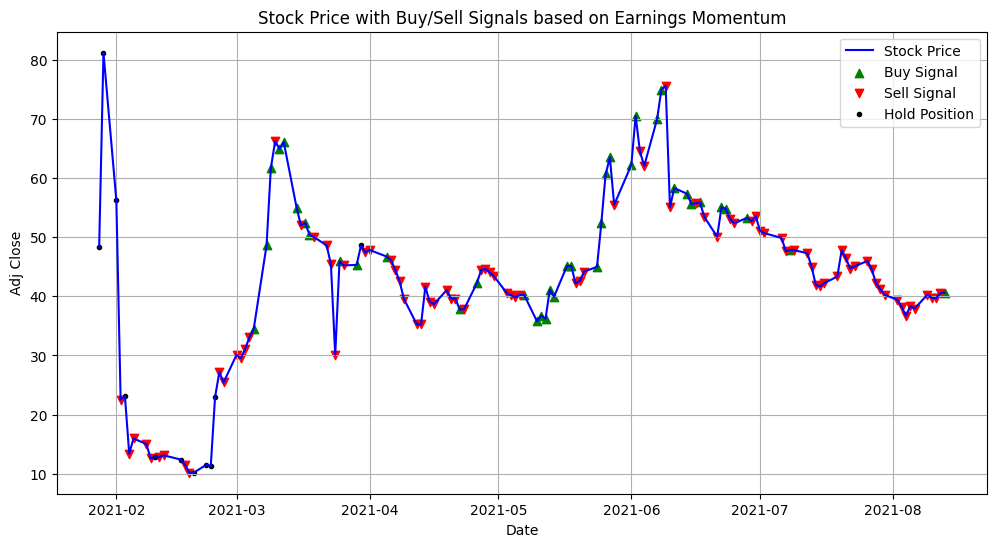

In [112]:
# Plot the stock price along with buy/sell signals
plt.figure(figsize=(12, 6))
plt.plot(df_with_signals['Date'], df_with_signals['Adj Close']['GME'], label='Stock Price', color='blue')
plt.scatter(df_with_signals['Date'][df_with_signals['Signal'] == 1],
            df_with_signals['Adj Close']['GME'][df_with_signals['Signal'] == 1],
            marker='^', color='green', label='Buy Signal')
plt.scatter(df_with_signals['Date'][df_with_signals['Signal'] == -1],
            df_with_signals['Adj Close']['GME'][df_with_signals['Signal'] == -1],
            marker='v', color='red', label='Sell Signal')
plt.scatter(df_with_signals['Date'][df_with_signals['Signal'] == 0],
            df_with_signals['Adj Close']['GME'][df_with_signals['Signal'] == 0],
            marker='.', color='black', label='Hold Position')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Stock Price with Buy/Sell Signals based on Earnings Momentum')
plt.legend()
plt.grid(True)
plt.show()